In [1]:
import numpy as np
import matplotlib.pyplot as plt

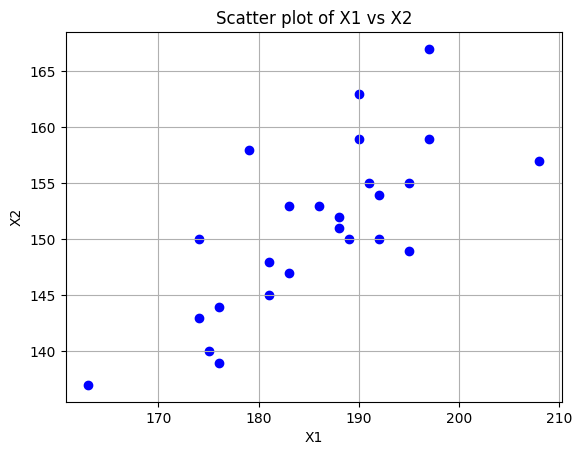

In [2]:
# draw a scatter plot of X1 and X2
D = np.loadtxt('data/son.txt', comments='%')
plt.scatter(D[:, 0], D[:, 1], c='blue', marker='o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of X1 vs X2')
plt.grid()
plt.show()

取兩個變數資料進行 PCA 並觀察
- 新變數間的關係
- 新變數與原變數變異分布之不同

其中

$$Z_1 = a_{11} X_1 + a_{12} X_2$$
$$Z_2 = a_{21} X_1 + a_{22} X_2$$


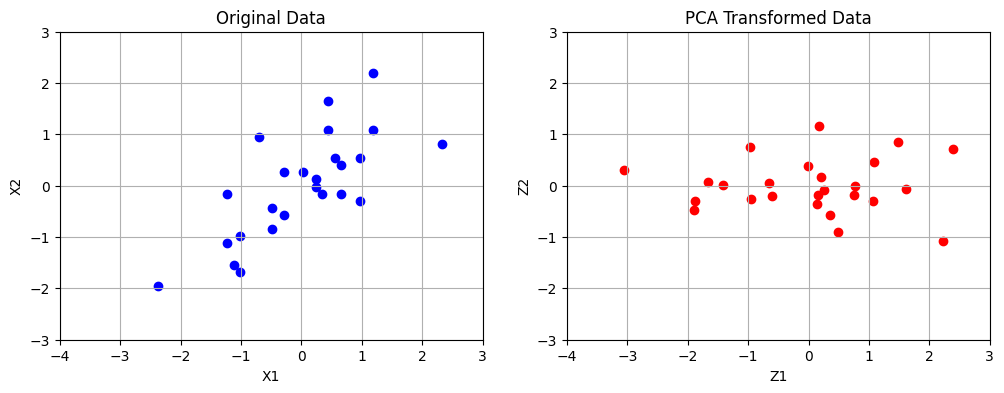

In [3]:
X = D[:, 0:2]
# standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std
# Do PCA on the standardized data
cov_matrix = np.cov(X_standardized, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
# Project the data onto the first two principal components
X_pca = X_standardized.dot(eigenvectors[:, :2])
# Draw a 1x2 scatter plot of the original data and the PCA-transformed data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c='blue', marker='o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data')
plt.xlim(-4, 3)
plt.ylim(-3, 3)
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='red', marker='o')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title('PCA Transformed Data')
plt.xlim(-4, 3)
plt.ylim(-3, 3)
plt.grid()
plt.show()